### CapstoneTwo : Part 3 - Training Data

### Cancer Patient Data
https://www.kaggle.com/rishidamarla/cancer-patients-data?select=cancer+patient+data+sets.xlsx

In [9]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# function to plot Top 10 feature importance

def feature_importance(model, X, top):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        ordered = importances[indices].reshape(-1,)
        cols = X.columns[indices]
        return pd.DataFrame({'variables': cols[:top], 'importances':ordered[:top]}).plot.bar(x='variables', y='importances')

In [11]:
# import data from the csv file

data = pd.read_csv('cancer_patient_data sets.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'cancer_patient_data sets.csv'

In [ ]:
top_lifestyle = ['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', \
         'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Snoring', 'Level']

In [ ]:

df = data[top_lifestyle]
df.rename(columns={"chronic Lung Disease": "Chronic Lung Disease", "OccuPational Hazards" : "Occupational Hazards"}, inplace = True)
df.head()

In [ ]:
#imported modules for StandardScaler and train_test_split from sklearn.

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# mapping "Level" to int 

encoding = {'Low': 0, 'Medium': 1, 'High': 2}
df['Level_cat'] = df['Level'].map(encoding)

#### "Level" factorized/mapped as
    2 : High
    1 : Medium
    0 : Low

In [ ]:
df.head()


In [ ]:
X = df.drop(['Level', 'Level_cat'], axis = 1)
X.reshape(1, -1)
y = df['Level_cat']

In [ ]:
# split data into 80% training and 20% testing 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [ ]:
# apply StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
print(X_train_sc)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC

In [ ]:
# fit Random Forest Classifier

rf_model = RandomForestClassifier(n_jobs = 2, random_state = 0)


In [ ]:
# hyperparameter list to evaluate

n_estimators = [10, 100, 500, 1000]
max_features = ['sqrt', 'log2']

# define grid search and fit the hyperparameter list
param_rf = dict(n_estimators = n_estimators, max_features = max_features)

grid_rf = GridSearchCV(rf_model, param_grid = param_rf, cv = 3, n_jobs = -1)
best_rf = grid_rf.fit(X_train, y_train)

In [ ]:
grid_rf.best_params_

In [ ]:
# fitting and predicting with hyperparameters that were optimized

model_rf2 = RandomForestClassifier(n_jobs = 2, random_state = 0, n_estimators = 10, max_features = 'sqrt')
model_rf2.fit(X_train, y_train)

In [ ]:
y_rf = model_rf2.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_rf))

In [ ]:
# print accuracy score and confusion matrix

a_score = accuracy_score(y_test, y_rf)
confusion_m = confusion_matrix(y_test, y_rf)

print("-RandomForest Classifier-\n")
print("Accuracy Score:", a_score)
print("Confusion Matrix:\n", confusion_m)

In [ ]:
# plot Top 10 features

feature_importance(model_rf2, X_test, top=10)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0)


In [ ]:
# hyperparameter list to evaluate

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

param_lr = dict(solver = solvers, penalty = penalty, C = c_values)

In [ ]:
# define grid search and fit the hyperparameter list

grid_lr = GridSearchCV(lr_model, param_grid = param_lr, n_jobs = -1, cv = 3)
best_lr = grid_lr.fit(X_train_sc, y_train)

In [ ]:
grid_lr.best_params_

In [ ]:
# fitting and predicting with hyperparameters that were optimized

lr_model2 = LogisticRegression(random_state=0, C = 100, penalty = 'l2', solver = 'newton-cg')
lr_model2.fit(X_train_sc, y_train)
y_lr = lr_model2.predict(X_test_sc)


In [ ]:
print(metrics.classification_report(y_test, y_lr))

In [ ]:
# print accuracy score and confusion matrix

a_score = accuracy_score(y_test, y_lr)
confusion_m = confusion_matrix(y_test, y_lr)

print("-Logistic Regression-\n")
print("Accuracy Score:", a_score)
print("Confusion Matrix:\n", confusion_m)

In [ ]:
importance = lr_model2.coef_[0]
# summarize feature importance
print(importance)
x_tick = []

for i,v in enumerate(importance):
	print('Feature: {}, Score: {}'.format(df.columns[i],v))
	x_tick.append(df.columns[i])

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

plt.xticks(np.arange(len(importance)), x_tick)
plt.xticks(rotation = 90)

plt.show()

### GradientBoostingClassifier

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

In [6]:
gb_model = GradientBoostingClassifier(random_state=0)


In [7]:
# hyperparameter list to evaluate

estimators = [5,50,250,500]
depth = [1,3,5,7,9]
learning = [0.01,0.1,1,10,100]

param_gb = dict(n_estimators = estimators, max_depth = depth, learning_rate = learning)

In [8]:
# define grid search and fit the hyperparameter list

grid_gb = GridSearchCV(gb_model, param_grid = param_gb, cv = 3, verbose = 1, 
                      n_jobs = -1)
best_gb = grid_gb.fit(X_train, y_train)

NameError: name 'GridSearchCV' is not defined

In [34]:
grid_gb.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}

In [35]:
# fitting and predicting with hyperparameters that were optimized

gb_model2 = GradientBoostingClassifier(random_state=0, learning_rate = 0.01, max_depth = 3, n_estimators = 250)
gb_model2.fit(X_train_sc, y_train)
y_gb = gb_model2.predict(X_test_sc)

In [36]:
print(metrics.classification_report(y_test, y_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        75

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [37]:
# print accuracy score and confusion matrix

a_score = accuracy_score(y_test, y_gb)
confusion_m = confusion_matrix(y_test, y_gb)

print("-Gradient Boosting Classifier-\n")
print("Accuracy Score:", a_score)
print("Confusion Matrix:\n", confusion_m)

-Gradient Boosting Classifier-

Accuracy Score: 1.0
Confusion Matrix:
 [[67  0  0]
 [ 0 58  0]
 [ 0  0 75]]


<AxesSubplot:xlabel='variables'>

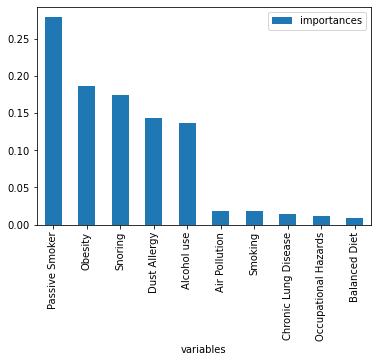

In [38]:
# plot Top 10 features

feature_importance(gb_model2, X_test, top=10)